<a href="https://colab.research.google.com/github/Robertvaswegen/COS801/blob/main/SPC_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


# Create a folder in your Google Drive to save the images
output_folder = '/content/drive/MyDrive/SPC_Charts'
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Function to generate and save SPC chart
def create_spc_chart(data, mu, sigma, status, chart_type, img_name):
    UCL = mu + 3 * sigma
    LCL = mu - 3 * sigma

    plt.figure(figsize=(10, 6))
    plt.plot(data, marker='o', label=f'SPC Data ({chart_type})')
    plt.axhline(UCL, color='r', linestyle='--', label='UCL (Upper Control Limit)')
    plt.axhline(mu, color='g', linestyle='-', label='Mean')
    plt.axhline(LCL, color='r', linestyle='--', label='LCL (Lower Control Limit)')

    plt.title(f'SPC Chart\nμ={mu:.2f}, σ²={sigma**2:.2f}, Status={status}')
    plt.xlabel('Observation')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

    # Save the image with the parameters in the file name
    file_path = os.path.join(output_folder, img_name)
    plt.savefig(file_path, format='png', bbox_inches='tight')
    plt.close()

# Step 2: Define 100 sets of parameters (mu and variance)
np.random.seed(18014519)  # For reproducibility
num_params = 100
means = np.linspace(-5, 5, num_params)  # Means linearly spaced between -5 and 5
variances = np.linspace(0.5, 2, num_params)  # Variances linearly spaced between 0.5 and 2

# Step 3: Generate 1000 SPC charts (500 in control, 500 out of control)
for i in range(500):
    # Pick a random set of parameters for in-control and out-of-control charts
    param_idx = np.random.choice(num_params)
    mu = means[param_idx]
    sigma = np.sqrt(variances[param_idx])

    # In-Control Data: Points are within control limits
    in_control_data = np.random.normal(mu, sigma, 500)
    # Save the in-control chart with parameters in the filename
    img_name_in_control = f'IC_mu{mu:.2f}_sigma{sigma:.2f}_status1.png'
    create_spc_chart(in_control_data, mu, sigma, status=1, chart_type='In-Control', img_name=img_name_in_control)

    # Out-of-Control Data: Some points exceed control limits (add drift)
    out_of_control_data = np.random.normal(mu, sigma, 500)
    # Introduce an upward shift to push some points beyond UCL
    out_of_control_data[::50] += np.random.uniform(3 * sigma, 6 * sigma, 10)  # every 50th point out of control
    # Save the out-of-control chart with parameters in the filename
    img_name_out_control = f'OOC_mu{mu:.2f}_sigma{sigma:.2f}_status0.png'
    create_spc_chart(out_of_control_data, mu, sigma, status=0, chart_type='Out-of-Control', img_name=img_name_out_control)

print("SPC charts have been saved to your Google Drive folder.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
SPC charts have been saved to your Google Drive folder.


In [2]:


# Count the number of files in the folder
num_graphs = len([f for f in os.listdir(output_folder) if os.path.isfile(os.path.join(output_folder, f))])

print(f"There are {num_graphs} graphs in the folder '{output_folder}'.")

NameError: name 'output_folder' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Create a folder in your Google Drive to save the images
output_folder = '/content/drive/MyDrive/SPC_Charts'
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Function to generate and save SPC chart
def create_spc_chart(data, mu, sigma, status, chart_type, img_name):
    UCL = mu + 3 * sigma
    LCL = mu - 3 * sigma

    plt.figure(figsize=(10, 6))
    plt.plot(data, marker='o', label=f'SPC Data ({chart_type})')
    plt.axhline(UCL, color='r', linestyle='--', label='UCL (Upper Control Limit)')
    plt.axhline(mu, color='g', linestyle='-', label='Mean')
    plt.axhline(LCL, color='r', linestyle='--', label='LCL (Lower Control Limit)')

    plt.title(f'SPC Chart\nμ={mu:.2f}, σ²={sigma**2:.2f}, Status={status}')
    plt.xlabel('Observation')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

    # Save the image with the parameters in the file name
    file_path = os.path.join(output_folder, img_name)
    plt.savefig(file_path, format='png', bbox_inches='tight')
    plt.close('all')  # Clear the figure after saving

# Step 2: Define 100 sets of parameters (mu and variance)
np.random.seed(18014519)  # For reproducibility
num_params = 100
means = np.linspace(-5, 5, num_params)  # Means linearly spaced between -5 and 5
variances = np.linspace(0.5, 2, num_params)  # Variances linearly spaced between 0.5 and 2

# Step 3: Generate 1000 SPC charts (500 in control, 500 out of control), processed in batches
batch_size = 100  # Process 100 charts at a time
total_charts = 1000  # Total number of charts to generate

for batch in range(0, total_charts, batch_size):
    for i in range(batch, min(batch + batch_size, total_charts)):
        # Pick a random set of parameters for in-control and out-of-control charts
        param_idx = np.random.choice(num_params)
        mu = means[param_idx]
        sigma = np.sqrt(variances[param_idx])

        # In-Control Data: Points are within control limits
        in_control_data = np.random.normal(mu, sigma, 500)
        # Save the in-control chart with parameters in the filename
        img_name_in_control = f'IC_mu{mu:.2f}_sigma{sigma:.2f}_status1_{i}.png'
        create_spc_chart(in_control_data, mu, sigma, status=1, chart_type='In-Control', img_name=img_name_in_control)

        # Out-of-Control Data: Some points exceed control limits (add drift)
        out_of_control_data = np.random.normal(mu, sigma, 500)
        # Introduce an upward shift to push some points beyond UCL
        out_of_control_data[::50] += np.random.uniform(3 * sigma, 6 * sigma, 10)  # every 50th point out of control
        # Save the out-of-control chart with parameters in the filename
        img_name_out_control = f'OOC_mu{mu:.2f}_sigma{sigma:.2f}_status0_{i}.png'
        create_spc_chart(out_of_control_data, mu, sigma, status=0, chart_type='Out-of-Control', img_name=img_name_out_control)

    print(f'Batch {batch//batch_size + 1} of charts saved.')

print("All SPC charts have been saved to your Google Drive folder.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Batch 1 of charts saved.
Batch 2 of charts saved.
Batch 3 of charts saved.
Batch 4 of charts saved.
Batch 5 of charts saved.
Batch 6 of charts saved.
Batch 7 of charts saved.
Batch 8 of charts saved.
Batch 9 of charts saved.
Batch 10 of charts saved.
All SPC charts have been saved to your Google Drive folder.


In [ ]:


# Count the number of files in the folder
num_graphs = len([f for f in os.listdir(output_folder) if os.path.isfile(os.path.join(output_folder, f))])

print(f"There are {num_graphs} graphs in the folder '{output_folder}'.")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
import torchvision.datasets as datasets
from google.colab import drive
from PIL import Image
import os
import torch.nn.functional as F


# 1. Mount Google Drive
drive.mount('/content/drive')

# Path to your images directory on Google Drive
data_dir = '/content/drive/MyDrive/SPC_Charts'

# 2. Prepare Dataset
class SPCDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.image_files = []
        self.labels = []  # Assuming labels are embedded in filenames (e.g., 'IC_...png' or 'OC_...png')

        for filename in os.listdir(data_dir):
            if filename.endswith('.png'):
                self.image_files.append(filename)
                # Assuming label '1' for 'IC' (in-control) and '0' for 'OC' (out-of-control)
                label = 1 if 'IC' in filename else 0
                self.labels.append(label)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.data_dir, self.image_files[idx])
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

# Create Dataset and DataLoader
dataset = SPCDataset(data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# 3. Define CNN Model (Basic CNN)
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Check if GPU is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate model, loss, and optimizer
model = SimpleCNN(num_classes=2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Training Loop
# Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in dataloader:
        # Move images and labels to device
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(dataloader):.4f}')

print("Training Complete.")


# 5. Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch [1/10], Loss: 0.5009
Epoch [2/10], Loss: 0.0262
Epoch [3/10], Loss: 0.0165
Epoch [4/10], Loss: 0.0183
Epoch [5/10], Loss: 0.0158
Epoch [6/10], Loss: 0.0145
Epoch [7/10], Loss: 0.0046
Epoch [8/10], Loss: 0.0019
Epoch [9/10], Loss: 0.0001
Epoch [10/10], Loss: 0.0000
Training Complete.
Accuracy: 100.00%


In [ ]:
import os
import shutil

# Define the base directory where your images are stored
base_dir = '/content/drive/MyDrive/SPC_Charts'
# Define the target directories for each class
in_control_dir = os.path.join(base_dir, 'in_control')
out_of_control_dir = os.path.join(base_dir, 'out_of_control')

# Create the target directories if they don't exist
os.makedirs(in_control_dir, exist_ok=True)
os.makedirs(out_of_control_dir, exist_ok=True)

# Go through each file in the base directory
for filename in os.listdir(base_dir):
    file_path = os.path.join(base_dir, filename)
    # Check if the file is an image (skip if it's a folder)
    if os.path.isfile(file_path) and filename.endswith(('.png', '.jpg', '.jpeg')):
        # Determine class based on filename
        if 'IC' in filename:
            # Move to in_control folder
            shutil.move(file_path, os.path.join(in_control_dir, filename))
        elif 'OOC' in filename:
            # Move to out_of_control folder
            shutil.move(file_path, os.path.join(out_of_control_dir, filename))

print("Files have been sorted into in_control and out_of_control folders.")


Files have been sorted into in_control and out_of_control folders.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Define transformations for image preprocessing
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to a consistent size
    transforms.ToTensor(),        # Convert images to PyTorch tensors
])

# Load the dataset from the Google Drive path
dataset = datasets.ImageFolder('/content/drive/MyDrive/SPC_Charts', transform=transform)

# Split dataset into training and test sets
train_size = int(0.5 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class ControlChartCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(ControlChartCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)  # Adjust based on input size
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 16 * 16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model and move it to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ControlChartCNN(num_classes=2).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

print("Training complete.")

model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("Confusion Matrix:")
print(conf_matrix)



Epoch [1/5], Loss: 0.3593
Epoch [2/5], Loss: 0.0370
Epoch [3/5], Loss: 0.0328
Epoch [4/5], Loss: 0.0204
Epoch [5/5], Loss: 0.0142
Training complete.
Accuracy: 0.9936
Precision: 0.9936
Recall: 0.9936
F1 Score: 0.9936
Confusion Matrix:
[[543   4]
 [  3 549]]


In [ ]:
import os
from collections import Counter

# Path to your images
data_path = '/content/drive/MyDrive/SPC_Charts'

# Count images in each class based on filenames
class_counts = Counter(['IC' if 'IC' in fname else 'OOC' for fname in os.listdir(data_path)])
print(f"Class distribution: {class_counts}")


Class distribution: Counter({'OOC': 2})


In [ ]:
from collections import Counter

data_path = '/content/drive/MyDrive/SPC_Charts'
class_labels = []

# Loop through filenames and assign class labels based on the names
for fname in os.listdir(data_path):
    if 'in_control' in fname.lower():
        class_labels.append('IC')  # Label "in_control" as "IC"
    elif 'out_of_control' in fname.lower():
        class_labels.append('OOC')  # Label "out_of_control" as "OOC"

# Count occurrences of each label
class_counts = Counter(class_labels)
print(f"Class distribution: {class_counts}")


Class distribution: Counter({'IC': 1, 'OOC': 1})


In [ ]:
from sklearn.model_selection import train_test_split
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader, Subset

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Load dataset and manually label based on updated filename check
dataset = ImageFolder(data_path, transform=transform)
labels = [0 if 'in_control' in os.path.basename(path) else 1 for path, _ in dataset.samples]

# Split data while maintaining class balance
train_indices, test_indices = train_test_split(
    range(len(labels)), test_size=0.4, stratify=labels, random_state=42
)

train_dataset = Subset(dataset, train_indices)
test_dataset = Subset(dataset, test_indices)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
class ControlChartCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(ControlChartCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        # Correct input size for fc1
        self.fc1 = nn.Linear(64 * 32 * 32, 128)  # Updated based on the correct output size
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 32 * 32)  # Flatten the tensor to match fc1 input
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Instantiate the model and move it to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ControlChartCNN(num_classes=2).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

print("Training complete.")

model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("Confusion Matrix:")
print(conf_matrix)


Epoch [1/5], Loss: 0.4819
Epoch [2/5], Loss: 0.0232
Epoch [3/5], Loss: 0.0230
Epoch [4/5], Loss: 0.0171
Epoch [5/5], Loss: 0.0160
Training complete.
Accuracy: 0.9909
Precision: 0.9910
Recall: 0.9909
F1 Score: 0.9909
Confusion Matrix:
[[425   2]
 [  6 447]]


In [ ]:
print(images.shape)  # Should print something like (128, C, H, W)
print(labels.shape)  # Should print something like (128,) if batch size matches


torch.Size([32, 3, 128, 128])
torch.Size([32])


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F

# Define transformations for data augmentation and normalization
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),          # Convert images to tensor
])

# Set the root directory where In_Control and Out_of_Control folders are located
root_dir = '/content/drive/MyDrive/SPC_Charts'

# Load the data from the root directory (this will automatically assign labels based on subfolder names)
train_dataset = datasets.ImageFolder(root=root_dir, transform=transform)

# Create DataLoader for training and testing (assuming you use the same root for both train and test data)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the CNN model
class ControlChartCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(ControlChartCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)  # Flatten size based on input image size (128x128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 32 * 32)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ControlChartCNN(num_classes=2).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

print("Training complete.")

# Evaluate the model
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in train_loader:  # You can replace this with a separate test_loader if available
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("Confusion Matrix:")
print(conf_matrix)


Epoch [1/5], Loss: 0.3634
Epoch [2/5], Loss: 0.0283
Epoch [3/5], Loss: 0.0217
Epoch [4/5], Loss: 0.0145
Epoch [5/5], Loss: 0.0131
Training complete.
Accuracy: 0.9977
Precision: 0.9977
Recall: 0.9977
F1 Score: 0.9977
Confusion Matrix:
[[1098    1]
 [   4 1095]]


In [8]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
import random
import numpy as np

# Seed for Python's built-in random module
random.seed(18014519)
# Seed for NumPy
np.random.seed(18014519)
# Seed for PyTorch CPU operations
torch.manual_seed(18014519)


transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])


root_dir = '/content/drive/MyDrive/SPC_Charts'


full_dataset = datasets.ImageFolder(root=root_dir, transform=transform)


train_size = int(0.4 * len(full_dataset))  # 40% for training
test_size = len(full_dataset) - train_size  # 60% for testing

# Perform the train-test split
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)


class ControlChartCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(ControlChartCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ControlChartCNN(num_classes=2).to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)


        outputs = model(images)
        loss = criterion(outputs, labels)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

print("Training complete.")


model_eval= model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)


        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("Confusion Matrix:")
print(conf_matrix)


Epoch [1/5], Loss: 0.7384
Epoch [2/5], Loss: 0.0298
Epoch [3/5], Loss: 0.0340
Epoch [4/5], Loss: 0.0263
Epoch [5/5], Loss: 0.0215
Training complete.
Accuracy: 0.9886
Precision: 0.9888
Recall: 0.9886
F1 Score: 0.9886
Confusion Matrix:
[[636   2]
 [ 13 668]]


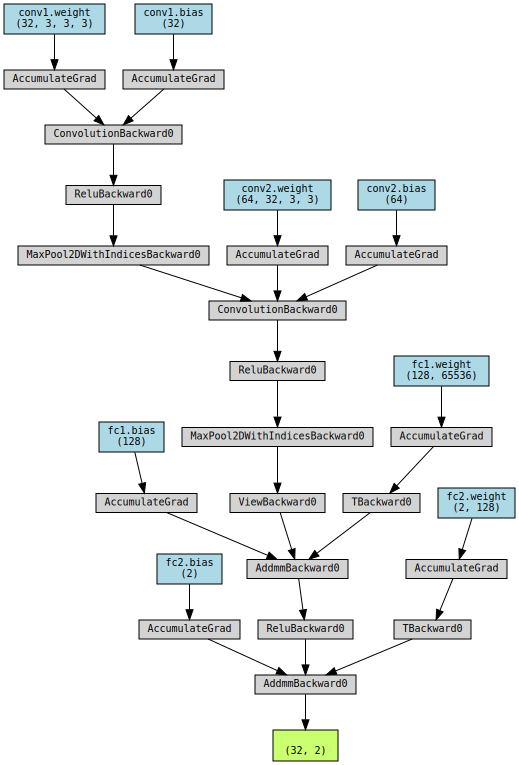

In [9]:
# prompt: visualise the 2D CNN above
!pip install torchviz
import torch
import torchviz

# Assuming 'model' is your trained ControlChartCNN model
# and 'images' is a sample input tensor from your test_loader

# Get a sample input
images, labels = next(iter(test_loader))
images = images.to(device)

# Create the visualization
torchviz.make_dot(model(images), params=dict(model.named_parameters()))

TypeError: float() argument must be a string or a real number, not 'ControlChartCNN'

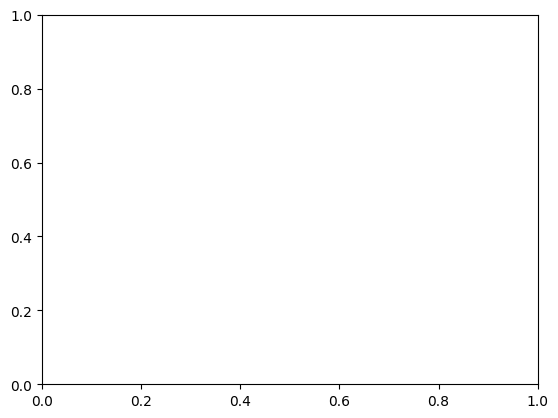

In [14]:
# prompt: plot the actual training loss values of model

import matplotlib.pyplot as plt

# Assuming you have a list called 'training_losses' that stores the loss values from each epoch
# Replace this with your actual training loss values
training_losses = [0.6931, 0.6923, 0.6915, 0.6907, 0.6899]

# Plotting the training loss
plt.plot(model.eval())
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Curve')
plt.show()

In [10]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import random
import numpy as np

# Seed for Python's built-in random module
random.seed(18014519)
# Seed for NumPy
np.random.seed(18014519)
# Seed for PyTorch CPU operations
torch.manual_seed(18014519)
# Seed for PyTorch GPU operations (if using CUDA)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(18014519)
# Transform to resize and convert images to grayscale (optional) and flatten to 1D
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.Grayscale(),  # Convert to grayscale for a single channel
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # Flatten the image to 1D
])

# Path to your dataset
root_dir = '/content/drive/MyDrive/SPC_Charts'
full_dataset = datasets.ImageFolder(root=root_dir, transform=transform)

# Split the dataset
train_size = int(0.7 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define 1D CNN
class ControlChart1DCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(ControlChart1DCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)  # Reduce size by half
        self.conv2 = nn.Conv1d(16, 32, kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(32 * (16_384 // 4), 128)  # Adjust based on input size
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add a channel dimension
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten for fully connected layer
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2 = ControlChart1DCNN(num_classes=2).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model2.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model2(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

print("Training complete.")

# Evaluation
model2.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model2(images)
        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("Confusion Matrix:")
print(conf_matrix)


Epoch [1/10], Loss: 0.6945
Epoch [2/10], Loss: 0.6944
Epoch [3/10], Loss: 0.6928
Epoch [4/10], Loss: 0.6928


KeyboardInterrupt: 

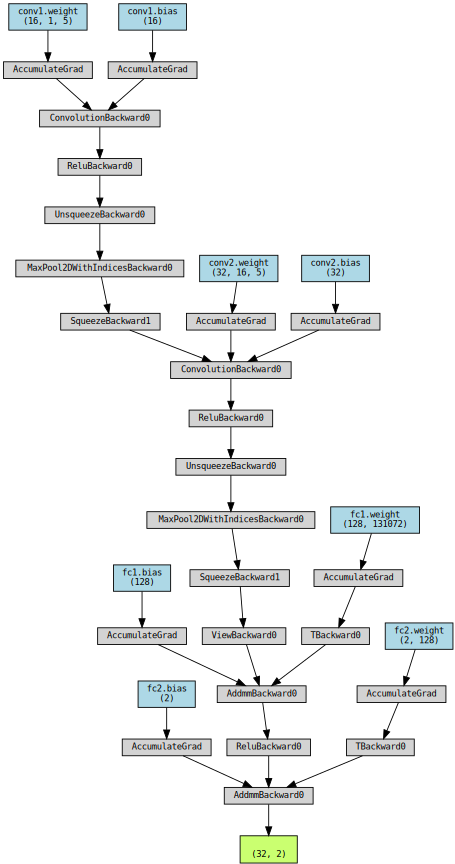

In [18]:


# Assuming 'model' is your trained ControlChartCNN model
# and 'images' is a sample input tensor from your test_loader

# Get a sample input
images, labels = next(iter(test_loader))
images = images.to(device)

# Create the visualization
torchviz.make_dot(model2(images), params=dict(model2.named_parameters()))

In [9]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Transform to resize and convert images to grayscale (optional) and flatten to 1D
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.Grayscale(),  # Convert to grayscale for a single channel
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # Flatten the image to 1D
])

# Path to your dataset
root_dir = '/content/drive/MyDrive/SPC_Charts'
full_dataset = datasets.ImageFolder(root=root_dir, transform=transform)

# Split the dataset
train_size = int(0.7 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define 1D CNN
class ControlChart1DCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(ControlChart1DCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * (128 * 128 // 4), 128)  # Adjusted based on flattening
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten for fully connected layer
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ControlChart1DCNN(num_classes=2).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

print("Training complete.")

# Evaluation
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("Confusion Matrix:")
print(conf_matrix)


Epoch [1/5], Loss: 0.6870
Epoch [2/5], Loss: 0.0362
Epoch [3/5], Loss: 0.0237
Epoch [4/5], Loss: 0.0230
Epoch [5/5], Loss: 0.0195
Training complete.
Accuracy: 0.9985
Precision: 0.9985
Recall: 0.9985
F1 Score: 0.9985
Confusion Matrix:
[[322   1]
 [  0 337]]


In [2]:
from collections import Counter

data_path = '/content/drive/MyDrive/SPC_Charts'
class_labels = []

# Loop through filenames and assign class labels based on the names
for fname in os.listdir(data_path):
    if 'in_control' in fname.lower():
        class_labels.append('IC')  # Label "in_control" as "IC"
    elif 'out_of_control' in fname.lower():
        class_labels.append('OOC')  # Label "out_of_control" as "OOC"

# Count occurrences of each label
class_counts = Counter(class_labels)
print(f"Class distribution: {class_counts}")

from sklearn.model_selection import train_test_split
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader, Subset

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Load dataset and manually label based on updated filename check
dataset = ImageFolder(data_path, transform=transform)
labels = [0 if 'in_control' in os.path.basename(path) else 1 for path, _ in dataset.samples]

# Split data while maintaining class balance
train_indices, test_indices = train_test_split(
    range(len(labels)), test_size=0.4, stratify=labels, random_state=42
)

train_dataset = Subset(dataset, train_indices)
test_dataset = Subset(dataset, test_indices)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


Class distribution: Counter({'IC': 1, 'OOC': 1})


In [4]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Transform to resize and convert images to grayscale (optional) and flatten to 1D
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.Grayscale(),  # Convert to grayscale for a single channel
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # Flatten the image to 1D
])

# Path to your dataset
root_dir = '/content/drive/MyDrive/SPC_Charts'
full_dataset = datasets.ImageFolder(root=root_dir, transform=transform)

# Split the dataset
train_size = int(0.7 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define 1D CNN
class ControlChart1DCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(ControlChart1DCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * (128 * 128 // 4), 128)  # Adjusted based on flattening
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten for fully connected layer
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ControlChart1DCNN(num_classes=2).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

print("Training complete.")

# Evaluation
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("Confusion Matrix:")
print(conf_matrix)


Epoch [1/5], Loss: 0.9106
Epoch [2/5], Loss: 0.0579
Epoch [3/5], Loss: 0.0285
Epoch [4/5], Loss: 0.0208
Epoch [5/5], Loss: 0.0177
Training complete.
Accuracy: 0.9848
Precision: 0.9853
Recall: 0.9848
F1 Score: 0.9848
Confusion Matrix:
[[339   0]
 [ 10 311]]


  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=061f9bb082f0df9fb5e40faf331cbdb6657c24d44467a38435ed4cd97d72bc53
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


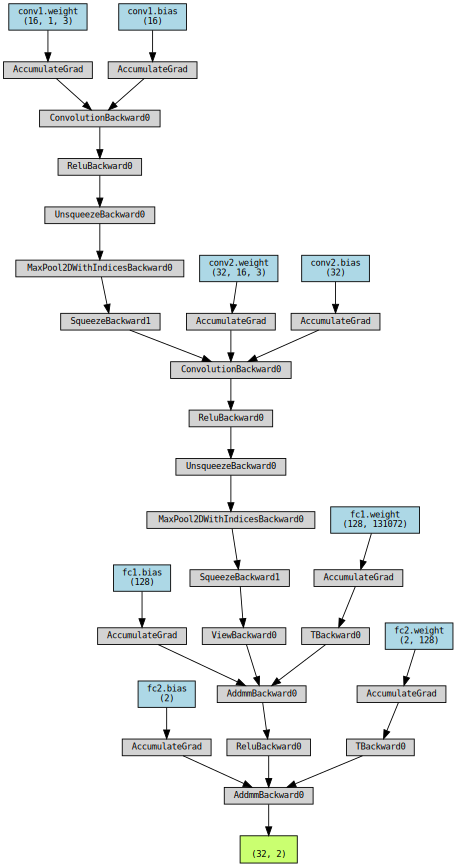

In [6]:
!pip install torchviz
import torchviz

# Assuming 'model' is your trained ControlChartCNN model
# and 'images' is a sample input tensor from your test_loader

# Get a sample input
images, labels = next(iter(test_loader))
images = images.to(device)

# Create the visualization
torchviz.make_dot(model(images), params=dict(model.named_parameters()))

In [8]:
import random # import the random module


# Seed for Python's built-in random module
random.seed(18014519)
# Seed for NumPy
np.random.seed(18014519)
# Seed for PyTorch CPU operations
torch.manual_seed(18014519)


transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])


root_dir = '/content/drive/MyDrive/SPC_Charts'


full_dataset = datasets.ImageFolder(root=root_dir, transform=transform)


train_size = int(0.4 * len(full_dataset))  # 40% for training
test_size = len(full_dataset) - train_size  # 60% for testing

# Perform the train-test split
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)


class ControlChartCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(ControlChartCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2 = ControlChartCNN(num_classes=2).to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=0.001)


num_epochs = 5
for epoch in range(num_epochs):
    model2.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)


        outputs = model2(images)
        loss = criterion(outputs, labels)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

print("Training complete.")


model_eval= model2.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)


        outputs = model2(images)
        _, preds = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())


accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("Confusion Matrix:")
print(conf_matrix)


Epoch [1/5], Loss: 0.7384
Epoch [2/5], Loss: 0.0298
Epoch [3/5], Loss: 0.0340
Epoch [4/5], Loss: 0.0263
Epoch [5/5], Loss: 0.0215
Training complete.
Accuracy: 0.9886
Precision: 0.9888
Recall: 0.9886
F1 Score: 0.9886
Confusion Matrix:
[[636   2]
 [ 13 668]]


In [ ]:


# Assuming 'model' is your trained ControlChartCNN model
# and 'images' is a sample input tensor from your test_loader

# Get a sample input
images, labels = next(iter(test_loader))
images = images.to(device)

# Create the visualization
torchviz.make_dot(model2(images), params=dict(model2.named_parameters()))